In [20]:
from pymongo import MongoClient
import re
import requests
import json
from getpass import getpass
import time
from dotenv import load_dotenv
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster
import pandas as pd
import os
import matplotlib.pyplot as plt

import src.mongos as mo
import src.foursquare as fq
import src.maps as mp

# MONGO 

In [21]:
c = mo.mongo_access("Ironhack", "companies")

In [22]:
df= mo.mongo_design_query(c)

In [23]:
df,cities = mo.cleaning_df(df)

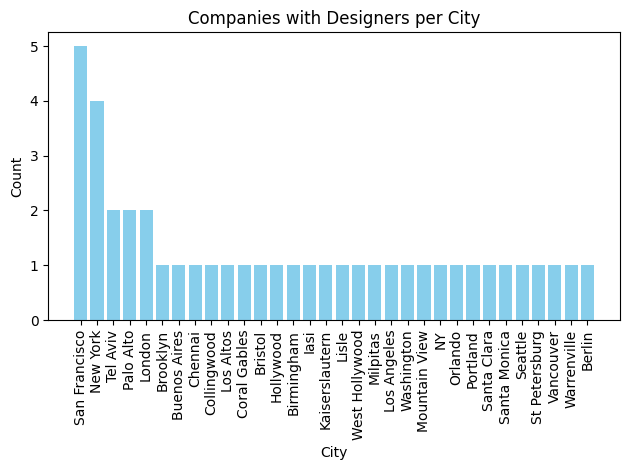

In [24]:
mo.designers_cities_plot(cities,df)

In [25]:
df2=mo.mongo_games_query(c)

In [26]:
df2=mo.cleaning_df2(df2)

In [27]:
game_top_cities=mo.game_cities_df(df2)

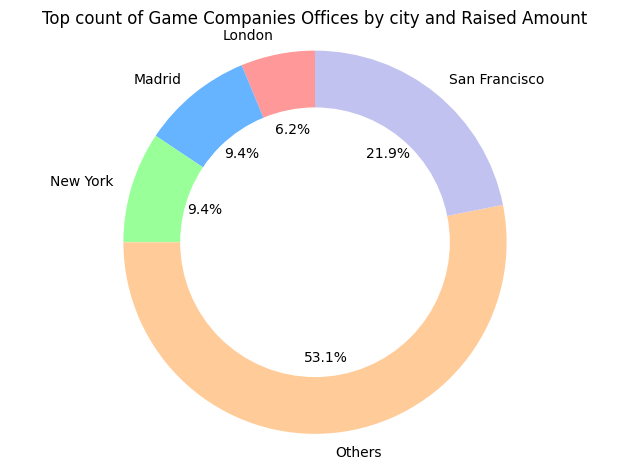

In [28]:
mo.game_cities_plot(game_top_cities)

In [29]:
df3=mo.design_gaming_df(c)

In [30]:
df3=mo.cleaning_df3(df3)

In [31]:
df_sf, df_nyc, df_lon = mo.cities_dfs(df3)

# FOURSQUARE API

In [32]:
df_sf = pd.read_csv("dataframes/df_sanfrancisco.csv")
df_sf = fq.df_foursquare(df_sf, "37.7968917","-122.4032027", "San Francisco") 
df_sf.to_csv("dataframes/df_sanfrancisco.csv", index=False)

In [33]:
df_lon = pd.read_csv("dataframes/df_london.csv")
df_lon = fq.df_foursquare(df_lon, "51.513248",'-0.154738', "London")
df_lon.to_csv("dataframes/df_london.csv", index=False)

In [34]:

df_nyc = pd.read_csv("dataframes/df_newyork.csv")
df_nyc = fq.df_foursquare(df_nyc, '40.7398872','-73.9850319', "New York") 
df_nyc.to_csv("dataframes/df_newyork.csv", index=False)

In [35]:
df=fq.best_locations_df(df_nyc, df_sf, df_lon)

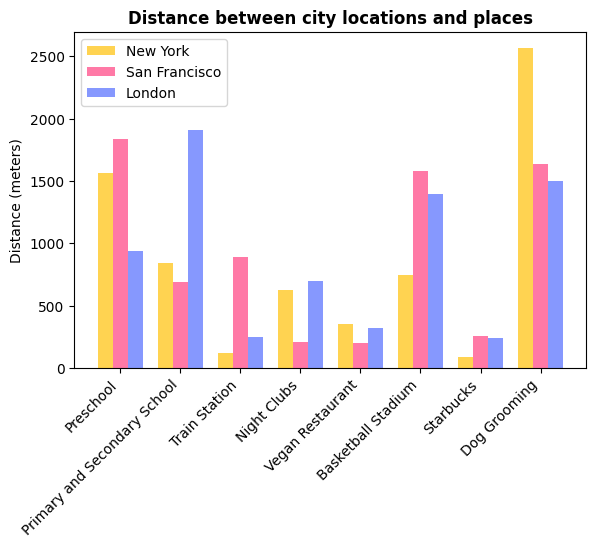

In [36]:
fq.distance_locations_plot(df)

In [37]:
df=fq.closest_distance_points(df)

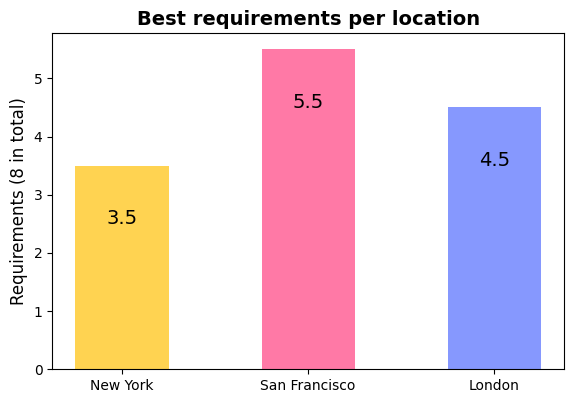

In [38]:
fq.cities_grades_plot(df)

# MAPS

In [39]:
sf_map=mp.creating_map(df_sf, "37.7968917", "-122.4032027", 14)
sf_map

In [40]:
lon_map=mp.creating_map(df_lon, '51.5134019','-0.1566624', 14) 
lon_map

In [41]:
nyc_map=mp.creating_map(df_nyc,'40.7398872','-73.9850319', 14) 
nyc_map